In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# FitBit Tracker Insights: Unveiling Trends in Wellness Technology Consumer Behavior

![](https://th.bing.com/th/id/R.a3e06837f29dd2f6ac5fffeb4dd76323?rik=TA3NHdXufVkT%2fA&pid=ImgRaw&r=0)

The Bellabeat case study presents a compelling opportunity to delve into the world of wellness technology and consumer behavior analysis. As a junior data analyst at Bellabeat, I'll be tasked with unraveling trends in smart device usage, particularly focusing on how consumers interact with non-Bellabeat smart devices. Through this analysis, I aim to unearth insights that can inform Bellabeat's marketing strategy, helping the company capitalize on growth opportunities in the global smart device market.

Employing a structured approach encompassing the data analysis process stages of ask, prepare, process, analyze, share, and act, I will navigate through the dataset, extract meaningful patterns, and translate them into actionable recommendations. With a meticulous eye for detail and a knack for storytelling through data, I will craft a comprehensive report containing clear summaries, detailed documentation, insightful visualizations, and high-level content recommendations.

By leveraging public data sources such as the FitBit Fitness Tracker Data and employing rigorous data cleaning and analysis techniques, I aim to provide Bellabeat with invaluable insights that can steer their marketing strategies towards success. As I embark on this capstone project, I look forward to honing my analytical skills, gaining practical experience, and delivering impactful results that contribute to Bellabeat's continued growth and success in the wellness technology industry.

In [1]:
# Load necessary libraries
library(tidyverse)
library(lubridate)  # For date manipulation
library(knitr)      # For better table presentation
library(ggplot2)    # For data visualization

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
base_path <- "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16"

# Load and preprocess the data
daily_activity <- read_csv(file.path(base_path, "dailyActivity_merged.csv"))
daily_sleep <- read_csv(file.path(base_path, "sleepDay_merged.csv"))
weight_info <- read_csv(file.path(base_path, "weightLogInfo_merged.csv"))


Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification fo

In [3]:
# Install and load the janitor package
install.packages("janitor")
library(janitor)

# Clean column names and convert to lowercase for daily_activity
daily_activity <- clean_names(daily_activity)
daily_activity <- rename_with(daily_activity, tolower)
head(daily_activity)

# Clean column names and convert to lowercase for daily_sleep
daily_sleep <- clean_names(daily_sleep)
daily_sleep <- rename_with(daily_sleep, tolower)
head(daily_sleep)

# Clean column names and convert to lowercase for weight_info
weight_info <- clean_names(weight_info)
weight_info <- rename_with(weight_info, tolower)
head(weight_info)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


In [4]:
# Clean and format date columns
daily_activity$date <- parse_date_time(daily_activity$activity_date, "%m/%d/%Y")
daily_activity$date <- date(daily_activity$date)
head(daily_activity)


daily_sleep$date_time <- parse_date_time(daily_sleep$sleep_day, "%m/%d/%Y %I:%M:%S %p")
daily_sleep$date <- date(daily_sleep$date_time)
head(daily_sleep)

weight_info$date_time <- parse_date_time(weight_info$date, "%m/%d/%Y %I:%M:%S %p")
weight_info$date <- date(weight_info$date_time)
head(weight_info)


id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,date
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2016-04-14
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,date_time,date
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dttm>,<date>
1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12,2016-04-12
1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13,2016-04-13
1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15,2016-04-15
1503960366,4/16/2016 12:00:00 AM,2,340,367,2016-04-16,2016-04-16
1503960366,4/17/2016 12:00:00 AM,1,700,712,2016-04-17,2016-04-17
1503960366,4/19/2016 12:00:00 AM,1,304,320,2016-04-19,2016-04-19


id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id,date_time
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dttm>
1503960366,2016-05-02,52.6,115.9631,22,22.65,TRUE,1.462234e+12,2016-05-02 23:59:59
1503960366,2016-05-03,52.6,115.9631,NA,22.65,TRUE,1.462320e+12,2016-05-03 23:59:59
1927972279,2016-04-13,133.5,294.3171,NA,47.54,FALSE,1.460510e+12,2016-04-13 01:08:52
2873212765,2016-04-21,56.7,125.0021,NA,21.45,TRUE,1.461283e+12,2016-04-21 23:59:59
2873212765,2016-05-12,57.3,126.3249,NA,21.69,TRUE,1.463098e+12,2016-05-12 23:59:59
4319703577,2016-04-17,72.4,159.6147,25,27.45,TRUE,1.460938e+12,2016-04-17 23:59:59


In [5]:
library(dplyr)

# Drop the 'date_time' column from 'weight_info'
weight_info <- select(weight_info, -date_time)

# Drop the 'activity_date' column from 'daily_activity'
daily_activity <- select(daily_activity, -activity_date)

# Drop the 'sleep_day' and 'date_time' columns from 'daily_sleep'
daily_sleep <- select(daily_sleep, -sleep_day, -date_time)


In [6]:
# Merge datasets
merged_data <- merge(merge(daily_activity, daily_sleep, by = c("id", "date"), all = TRUE), weight_info, by = c("id", "date"), all = TRUE)
head(merged_data)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,⋯,calories,total_sleep_records,total_minutes_asleep,total_time_in_bed,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,1985,1,327,346,NA,NA,NA,NA,NA,NA
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,1797,2,384,407,NA,NA,NA,NA,NA,NA
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,⋯,1776,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,1745,1,412,442,NA,NA,NA,NA,NA,NA
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,1863,2,340,367,NA,NA,NA,NA,NA,NA
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,1728,1,700,712,NA,NA,NA,NA,NA,NA


In [7]:
# Remove unnecessary columns
merged_data <- merged_data %>%
  select(-c("tracker_distance", "logged_activities_distance", "total_sleep_records", "weight_pounds", "fat", "bmi", "is_manual_report"))

head(merged_data)

,id,date,total_steps,total_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_minutes_asleep,total_time_in_bed,weight_kg,log_id
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,0,25,13,328,728,1985,327,346,NA,NA
2,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,0,21,19,217,776,1797,384,407,NA,NA
3,1503960366,2016-04-14,10460,6.74,2.44,0.40,3.91,0,30,11,181,1218,1776,NA,NA,NA,NA
4,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,0,29,34,209,726,1745,412,442,NA,NA
5,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,0,36,10,221,773,1863,340,367,NA,NA
6,1503960366,2016-04-17,9705,6.48,3.19,0.78,2.51,0,38,20,164,539,1728,700,712,NA,NA


`geom_smooth()` using formula = 'y ~ x'


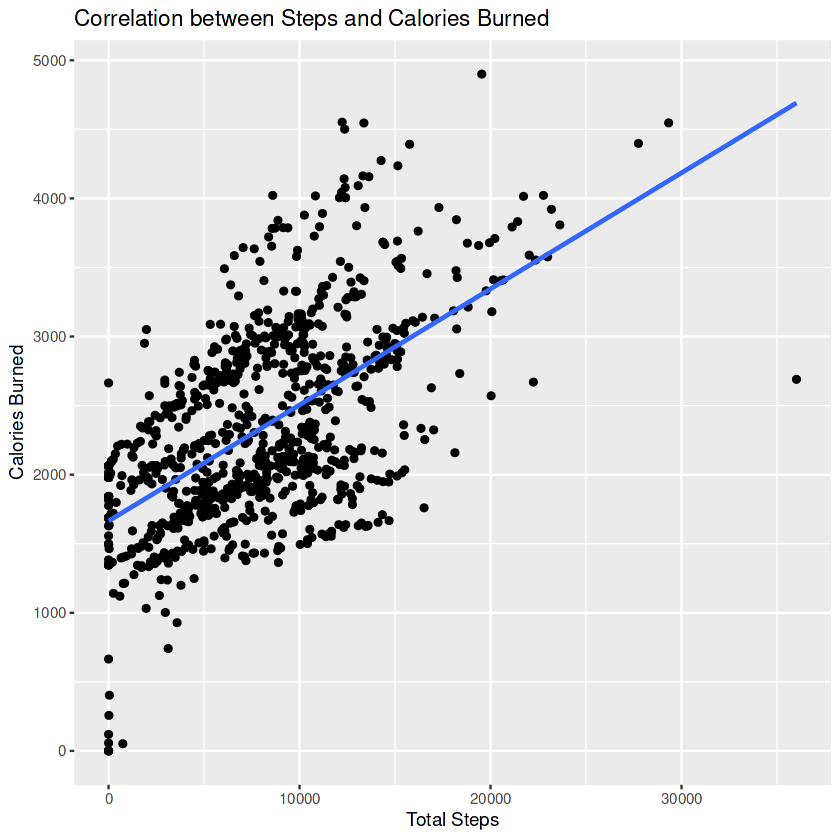

In [12]:
# Visualize correlations between variables
correlation_plot <- ggplot(merged_data, aes(x = total_steps, y = calories)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Correlation between Steps and Calories Burned",
       x = "Total Steps",
       y = "Calories Burned")

print(correlation_plot)

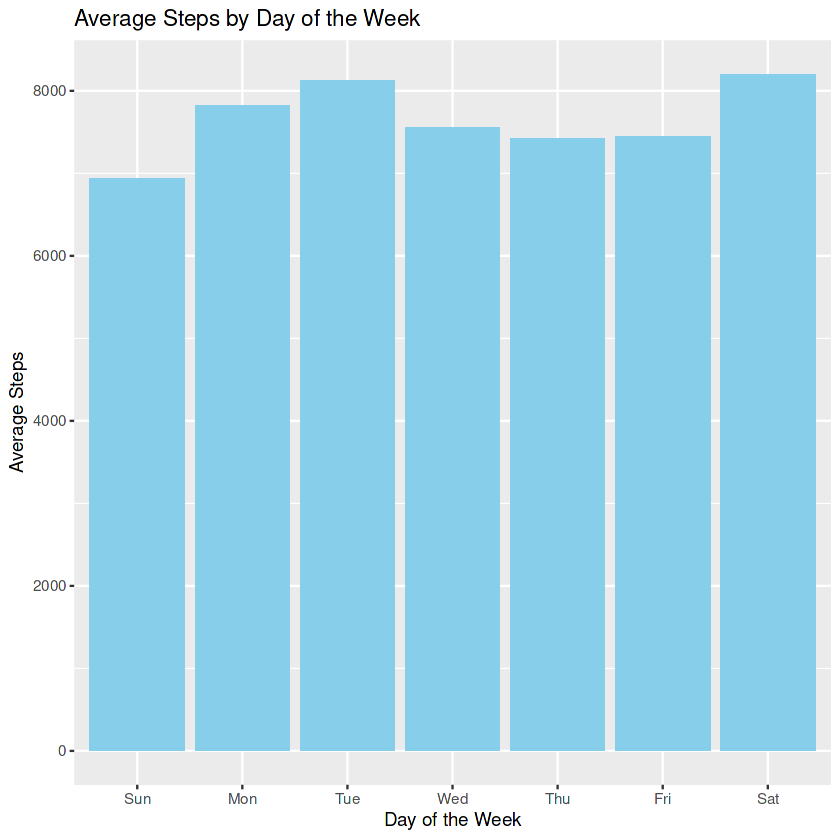

In [14]:
# Explore users' activity by day of the week
activity_by_day <- merged_data %>%
  mutate(weekday = wday(date, label = TRUE)) %>%
  group_by(weekday) %>%
  summarize(avg_steps = mean(total_steps, na.rm = TRUE))

# Visualize users' activity by day of the week
activity_by_day_plot <- ggplot(activity_by_day, aes(x = weekday, y = avg_steps)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Average Steps by Day of the Week",
       x = "Day of the Week",
       y = "Average Steps")

print(activity_by_day_plot)

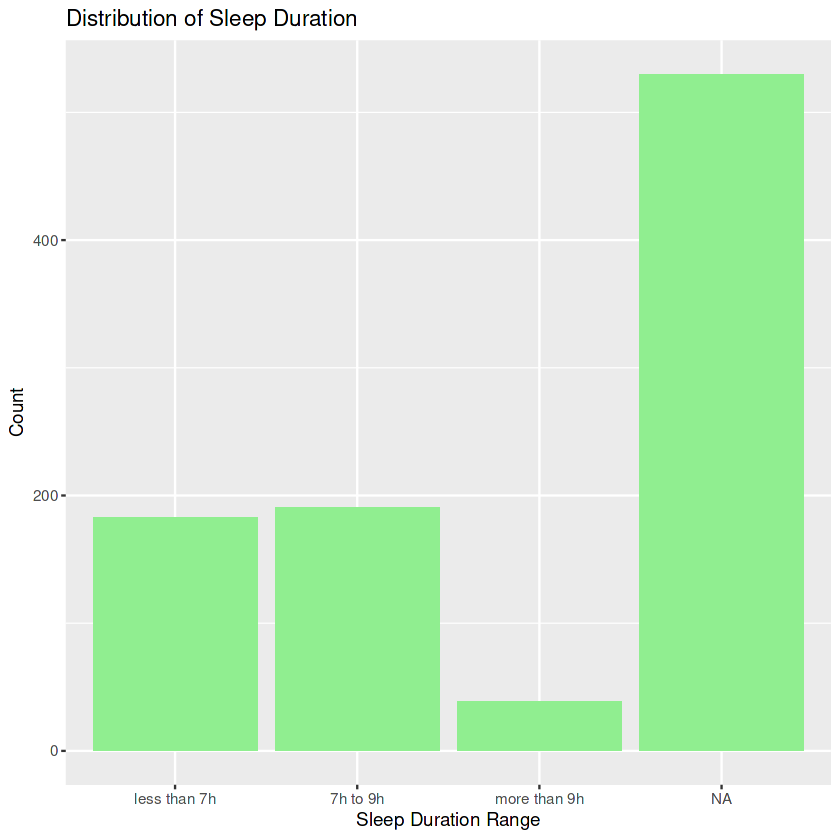

In [15]:
# Analyze sleep patterns
sleep_distribution <- merged_data %>%
  mutate(total_minutes_asleep_range = cut(total_minutes_asleep, breaks = c(0, 420, 540, Inf), labels = c("less than 7h", "7h to 9h", "more than 9h"))) %>%
  group_by(total_minutes_asleep_range) %>%
  summarize(count = n())

# Visualize sleep distribution
sleep_distribution_plot <- ggplot(sleep_distribution, aes(x = total_minutes_asleep_range, y = count)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  labs(title = "Distribution of Sleep Duration",
       x = "Sleep Duration Range",
       y = "Count")

print(sleep_distribution_plot)

Warning message:
“Removed 25 rows containing missing values (`geom_point()`).”


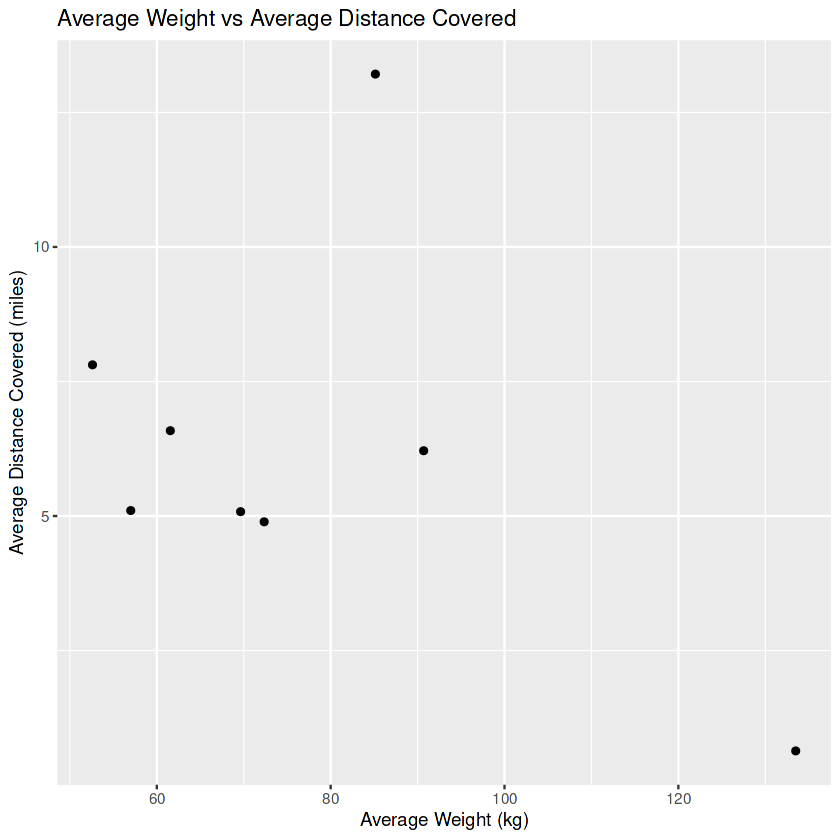

In [16]:
# Explore the relationship between weight and activity
weight_vs_activity <- merged_data %>%
  group_by(id) %>%
  summarize(avg_weight = mean(weight_kg, na.rm = TRUE),
            avg_distance = mean(total_distance, na.rm = TRUE))

# Visualize weight vs activity
weight_vs_activity_plot <- ggplot(weight_vs_activity, aes(x = avg_weight, y = avg_distance)) +
  geom_point() +
  labs(title = "Average Weight vs Average Distance Covered",
       x = "Average Weight (kg)",
       y = "Average Distance Covered (miles)")

print(weight_vs_activity_plot)

In [ ]:
# Load necessary libraries
library(tidyverse)
library(lubridate)  # For date manipulation
library(knitr)      # For better table presentation
library(ggplot2)    # For data visualization

In [19]:
# Hourly Activity Analysis
hourly_activity <- merged_data %>%
  mutate(hour = hour(datetime)) %>%
  group_by(hour) %>%
  summarize(avg_steps = mean(total_steps, na.rm = TRUE))

# Visualize hourly activity
hourly_activity_plot <- ggplot(hourly_activity, aes(x = hour, y = avg_steps)) +
  geom_line() +
  labs(title = "Average Steps by Hour of the Day",
       x = "Hour of the Day",
       y = "Average Steps")

print(hourly_activity_plot)

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `hour = hour(datetime)`.
[1mCaused by error in `hour()`:[22m
[33m![39m object 'datetime' not found


In [20]:
# Goal Achievement Analysis
goal_achievement <- merged_data %>%
  mutate(goal_Achieved = ifelse(total_steps >= 10000, "Yes", "No")) %>%
  summarize(percentage_Achieved = mean(goal_Achieved == "Yes", na.rm = TRUE) * 100)

# Print additional analyses
print(paste0("Percentage of Users Achieving Daily Activity Goal: ", goal_achievement$Percentage_Achieved, "%"))


[1] "Percentage of Users Achieving Daily Activity Goal: %"


In [22]:
# Comparison with Benchmarks (assuming 10000 steps as benchmark)
benchmark_comparison <- merged_data %>%
  mutate(above_benchmark = ifelse(total_steps >= 10000, "Yes", "No")) %>%
  summarize(percentage_above_benchmark = mean(above_benchmark == "Yes", na.rm = TRUE) * 100)

print(paste0("Percentage of Users Above 10,000 Steps Benchmark: ", benchmark_comparison$Percentage_Above_Benchmark, "%"))


[1] "Percentage of Users Above 10,000 Steps Benchmark: %"


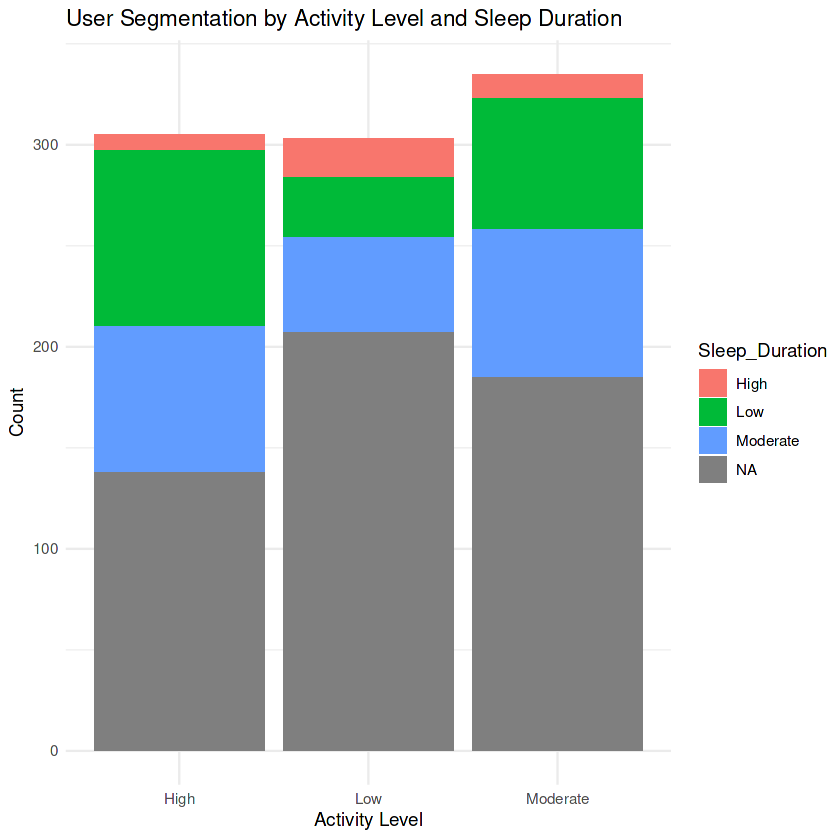

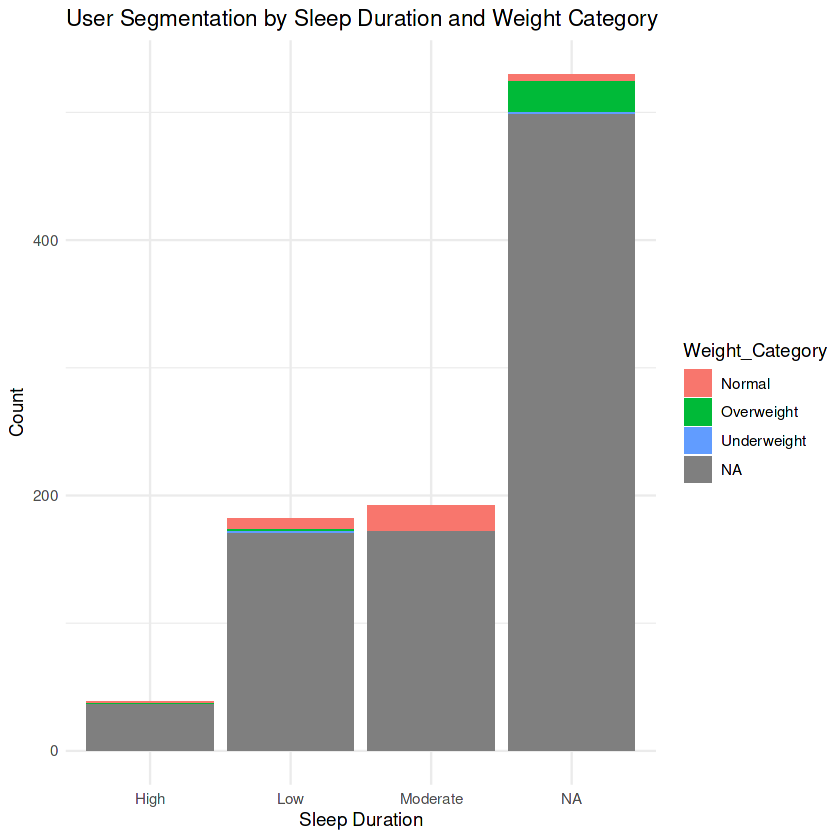

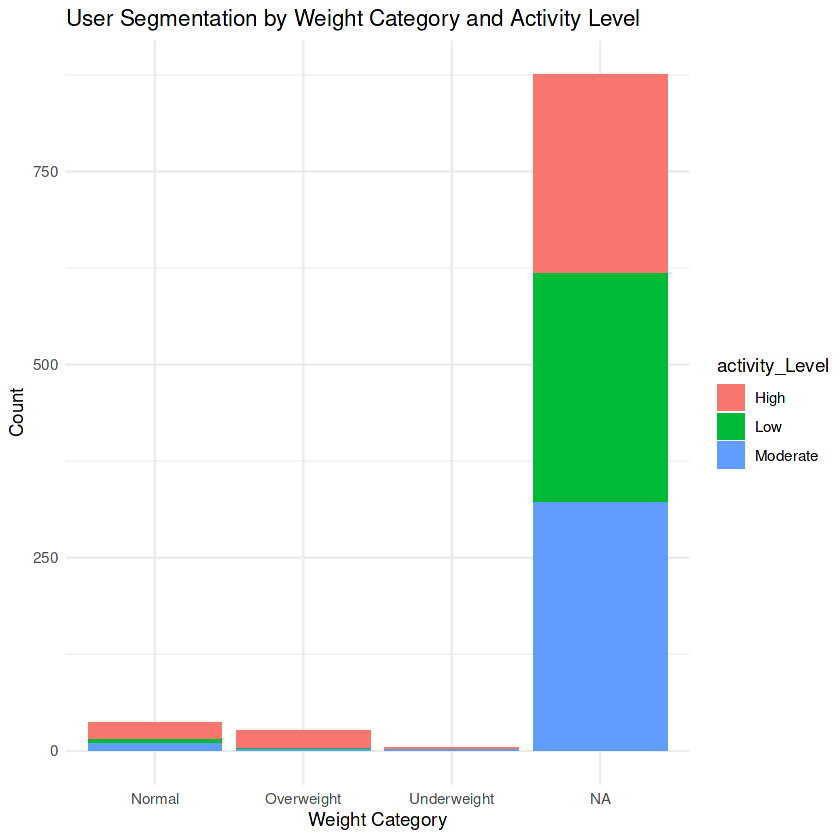

In [25]:
# User Segmentation
library(ggplot2)

# Create user segmentation data frame
user_segmentation <- merged_data %>%
  mutate(activity_Level = case_when(
    total_steps < 5000 ~ "Low",
    total_steps >= 5000 & total_steps < 10000 ~ "Moderate",
    total_steps >= 10000 ~ "High"
  ),
  Sleep_Duration = case_when(
    total_minutes_asleep < 420 ~ "Low",
    total_minutes_asleep >= 420 & total_minutes_asleep < 540 ~ "Moderate",
    total_minutes_asleep >= 540 ~ "High"
  ),
  Weight_Category = case_when(
    weight_kg < 60 ~ "Underweight",
    weight_kg >= 60 & weight_kg < 80 ~ "Normal",
    weight_kg >= 80 ~ "Overweight"
  ))

# Plot stacked bar charts
plot_activity_level <- ggplot(user_segmentation, aes(x = activity_Level, fill = Sleep_Duration)) +
  geom_bar(position = "stack") +
  labs(title = "User Segmentation by Activity Level and Sleep Duration",
       x = "Activity Level",
       y = "Count") +
  theme_minimal()

plot_sleep_duration <- ggplot(user_segmentation, aes(x = Sleep_Duration, fill = Weight_Category)) +
  geom_bar(position = "stack") +
  labs(title = "User Segmentation by Sleep Duration and Weight Category",
       x = "Sleep Duration",
       y = "Count") +
  theme_minimal()

plot_weight_category <- ggplot(user_segmentation, aes(x = Weight_Category, fill = activity_Level)) +
  geom_bar(position = "stack") +
  labs(title = "User Segmentation by Weight Category and Activity Level",
       x = "Weight Category",
       y = "Count") +
  theme_minimal()

# Print the plots
print(plot_activity_level)
print(plot_sleep_duration)
print(plot_weight_category)


In [24]:
# Longitudinal Analysis
longitudinal_analysis <- merged_data %>%
  group_by(id) %>%
  summarize(start_date = min(date),
            end_date = max(date),
            total_steps = sum(total_steps, na.rm = TRUE),
            total_minutes_asleep = sum(total_minutes_asleep, na.rm = TRUE),
            avg_weight = mean(weight_kg, na.rm = TRUE))

print("Longitudinal Analysis:")
print(longitudinal_analysis)

[1] "Longitudinal Analysis:"
# A tibble: 33 × 6
           id start_date end_date   total_steps total_minutes_asleep avg_weight
        <dbl> <date>     <date>           <dbl>                <dbl>      <dbl>
 1 1503960366 2016-04-12 2016-05-12      375619                 9007       52.6
 2 1624580081 2016-04-12 2016-05-12      178061                    0      NaN  
 3 1644430081 2016-04-12 2016-05-11      218489                 1176      NaN  
 4 1844505072 2016-04-12 2016-05-12       79982                 1956      NaN  
 5 1927972279 2016-04-12 2016-05-12       28400                 2085      134. 
 6 2022484408 2016-04-12 2016-05-12      352490                    0      NaN  
 7 2026352035 2016-04-12 2016-05-12      172573                14173      NaN  
 8 2320127002 2016-04-12 2016-05-12      146223                   61      NaN  
 9 2347167796 2016-04-12 2016-04-29      171354                 6702      NaN  
10 2873212765 2016-04-12 2016-05-12      234229                    0    

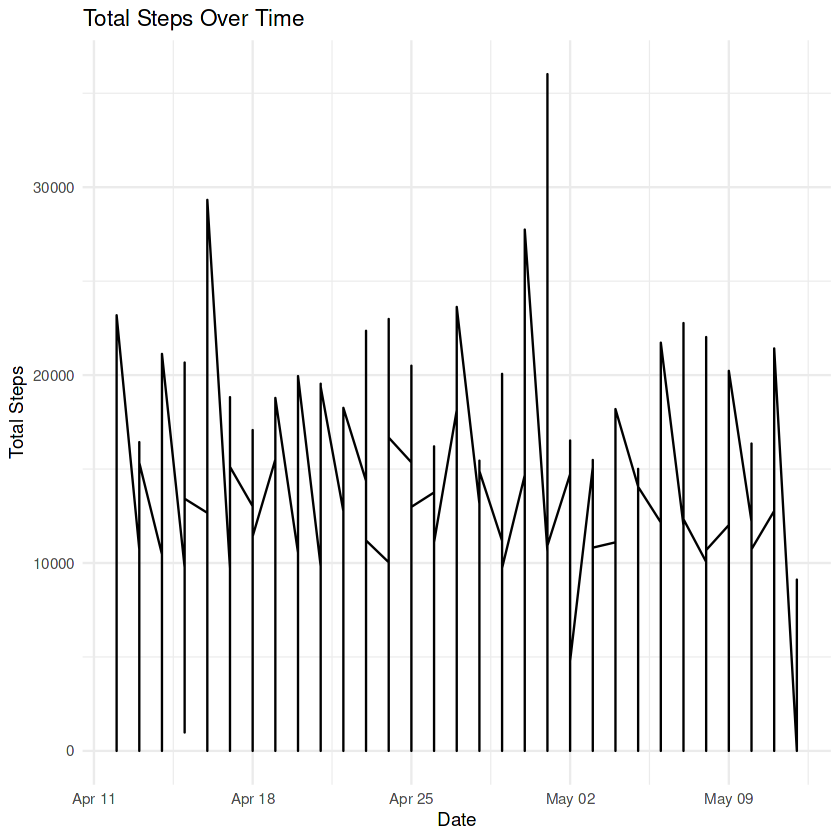

In [30]:
library(ggplot2)

# Create line plots for longitudinal analysis
plot_steps <- ggplot(merged_data, aes(x = date, y = total_steps)) +
  geom_line() +
  labs(title = "Total Steps Over Time",
       x = "Date",
       y = "Total Steps") +
  theme_minimal()

print(plot_steps)


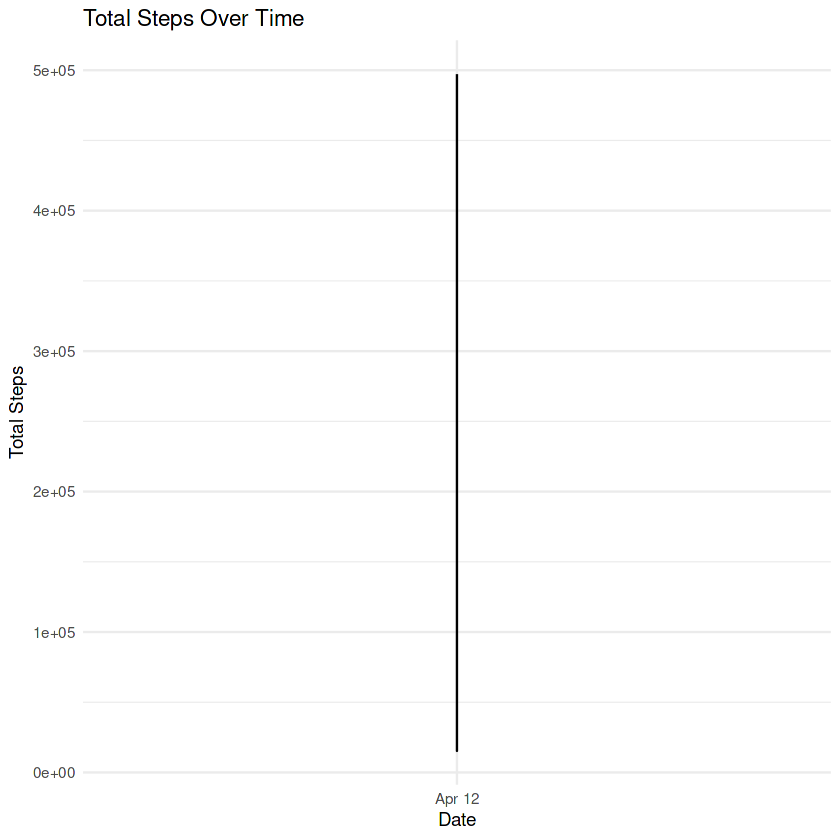

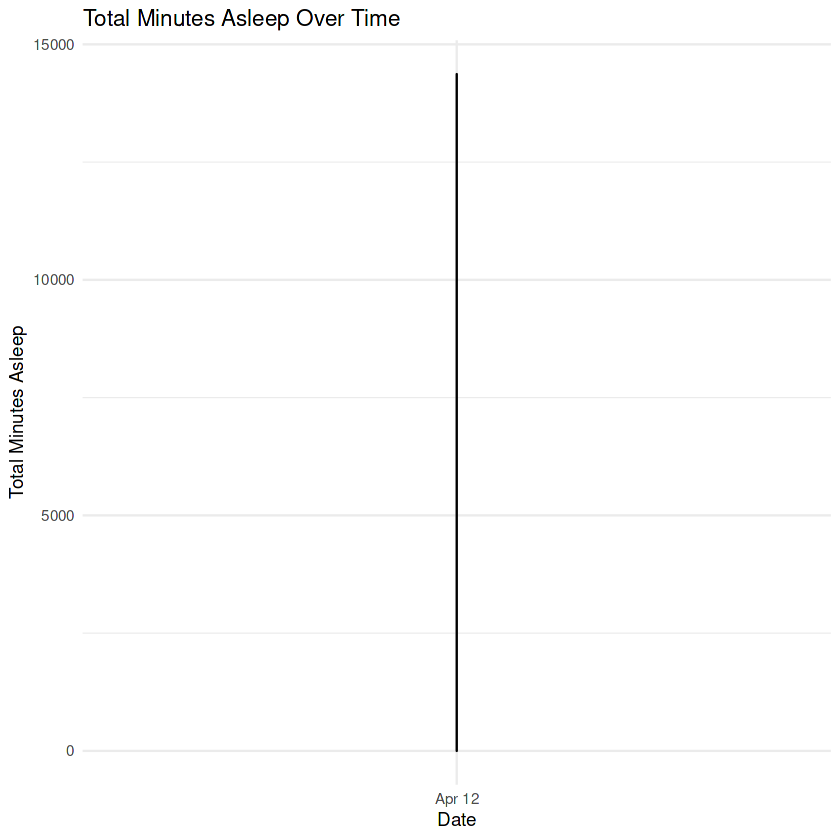

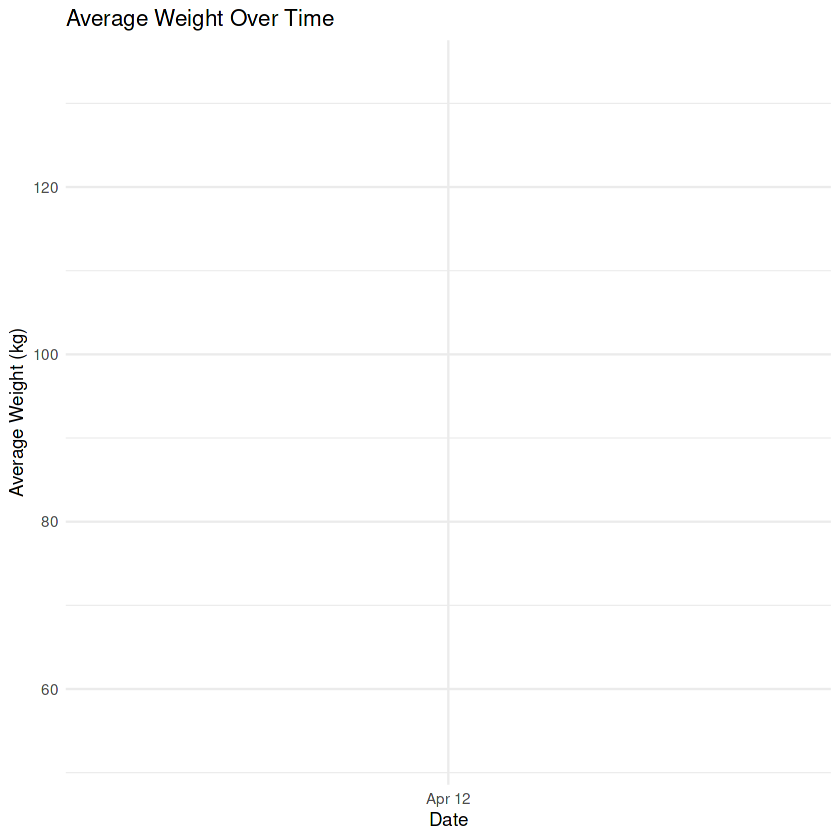

In [28]:
library(ggplot2)

# Create line plots for longitudinal analysis
plot_steps <- ggplot(longitudinal_analysis, aes(x = start_date, y = total_steps)) +
  geom_line() +
  labs(title = "Total Steps Over Time",
       x = "Date",
       y = "Total Steps") +
  theme_minimal()

plot_sleep <- ggplot(longitudinal_analysis, aes(x = start_date, y = total_minutes_asleep)) +
  geom_line() +
  labs(title = "Total Minutes Asleep Over Time",
       x = "Date",
       y = "Total Minutes Asleep") +
  theme_minimal()

plot_weight <- ggplot(longitudinal_analysis, aes(x = start_date, y = avg_weight)) +
  geom_line() +
  labs(title = "Average Weight Over Time",
       x = "Date",
       y = "Average Weight (kg)") +
  theme_minimal()

# Print the plots
print(plot_sleep)
print(plot_weight)


In [34]:
hourlySteps$date_time <- parse_date_time(hourlySteps$ActivityHour, "%m/%d/%Y %I:%M:%S %p")
hourlySteps$hour <- hour(hourlySteps$date_time)
hourlySteps

Id,ActivityHour,StepTotal,date_time,hour
<dbl>,<chr>,<dbl>,<dttm>,<int>
1503960366,4/12/2016 12:00:00 AM,373,2016-04-12 00:00:00,0
1503960366,4/12/2016 1:00:00 AM,160,2016-04-12 01:00:00,1
1503960366,4/12/2016 2:00:00 AM,151,2016-04-12 02:00:00,2
1503960366,4/12/2016 3:00:00 AM,0,2016-04-12 03:00:00,3
1503960366,4/12/2016 4:00:00 AM,0,2016-04-12 04:00:00,4
1503960366,4/12/2016 5:00:00 AM,0,2016-04-12 05:00:00,5
1503960366,4/12/2016 6:00:00 AM,0,2016-04-12 06:00:00,6
1503960366,4/12/2016 7:00:00 AM,0,2016-04-12 07:00:00,7
1503960366,4/12/2016 8:00:00 AM,250,2016-04-12 08:00:00,8


Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


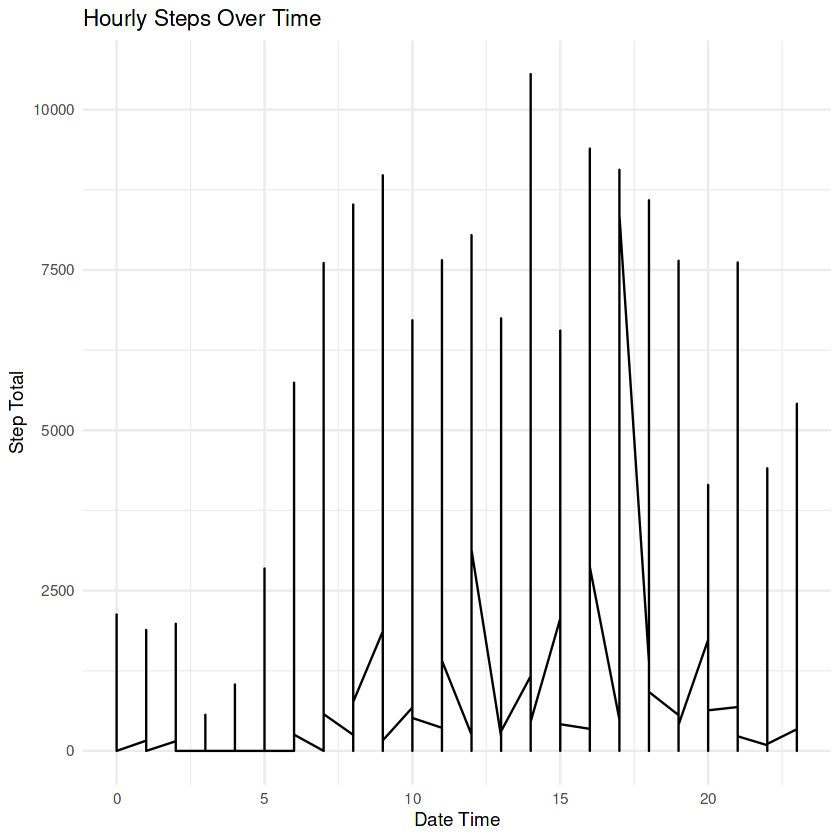

ERROR: Error in aes(x = Hour, y = TotalIntensity, y = AverageIntensity): formal argument "y" matched by multiple actual arguments


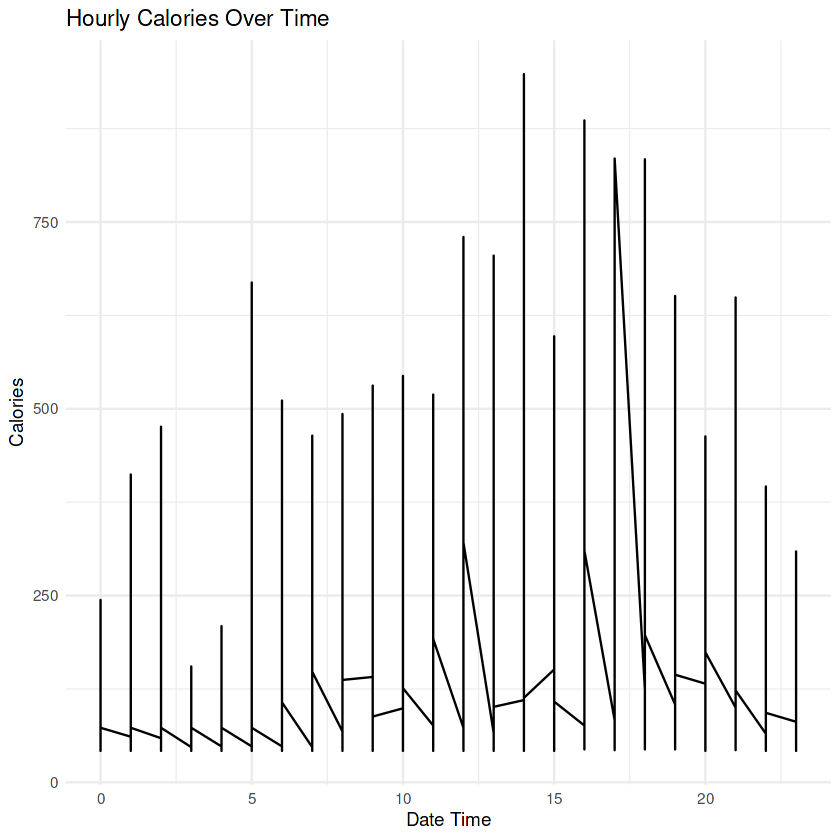

In [36]:
# Load required libraries
library(ggplot2)
library(dplyr)

# Load the data
base_path <- "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16"

# Load and preprocess the data
hourlySteps <- read_csv(file.path(base_path, "hourlySteps_merged.csv"))
hourlyCalories <- read_csv(file.path(base_path, "hourlyCalories_merged.csv"))
hourlyIntensities <- read_csv(file.path(base_path, "hourlyIntensities_merged.csv"))


hourlySteps$DateTime <- parse_date_time(hourlySteps$ActivityHour, "%m/%d/%Y %I:%M:%S %p")
hourlySteps$Hour <- hour(hourlySteps$DateTime)

hourlyCalories$DateTime <- parse_date_time(hourlyCalories$ActivityHour, "%m/%d/%Y %I:%M:%S %p")
hourlyCalories$Hour <- hour(hourlyCalories$DateTime)

hourlyIntensities$DateTime <- parse_date_time(hourlyIntensities$ActivityHour, "%m/%d/%Y %I:%M:%S %p")
hourlyIntensities$Hour <- hour(hourlyIntensities$DateTime)


# Plot hourly steps over time
plot_steps <- ggplot(hourlySteps, aes(x = Hour, y = StepTotal)) +
  geom_line() +
  labs(title = "Hourly Steps Over Time",
       x = "Date Time",
       y = "Step Total") +
  theme_minimal()

print(plot_steps)

# Plot hourly calories over time
plot_calories <- ggplot(hourlyCalories, aes(x = Hour, y = Calories)) +
  geom_line() +
  labs(title = "Hourly Calories Over Time",
       x = "Date Time",
       y = "Calories") +
  theme_minimal()

print(plot_calories)

# Plot hourly intensities over time
plot_intensities <- ggplot(hourlyIntensities, aes(x = Hour, y = TotalIntensity, y = AverageIntensity)) +
  geom_line() +
  labs(title = "Hourly Intensities Over Time",
       x = "Date Time",
       y = "Total Intensity") +
  theme_minimal()

print(plot_intensities)


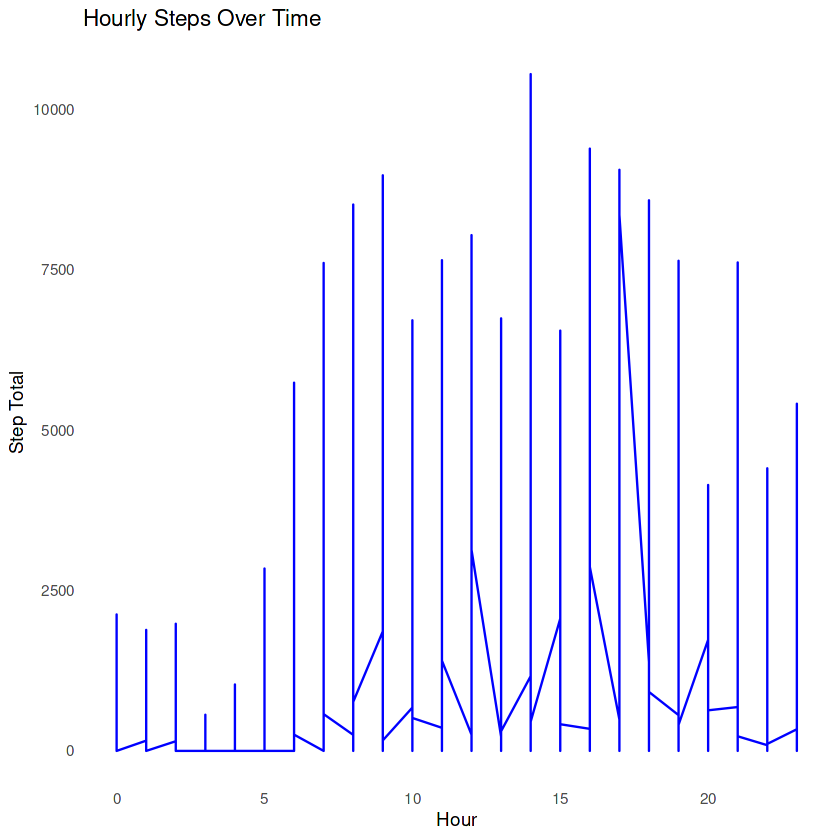

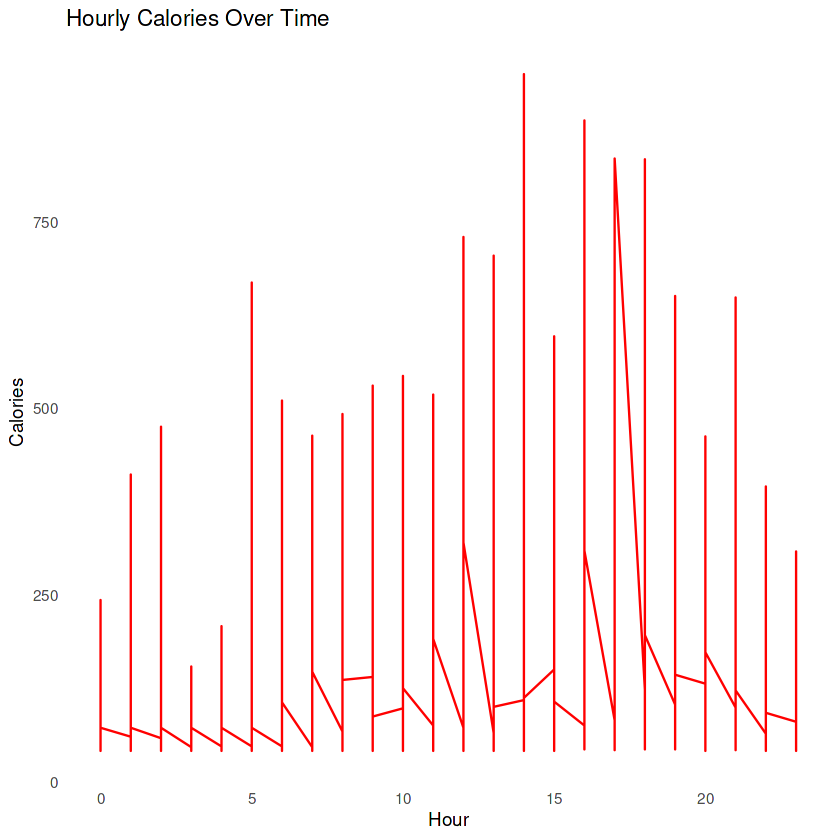

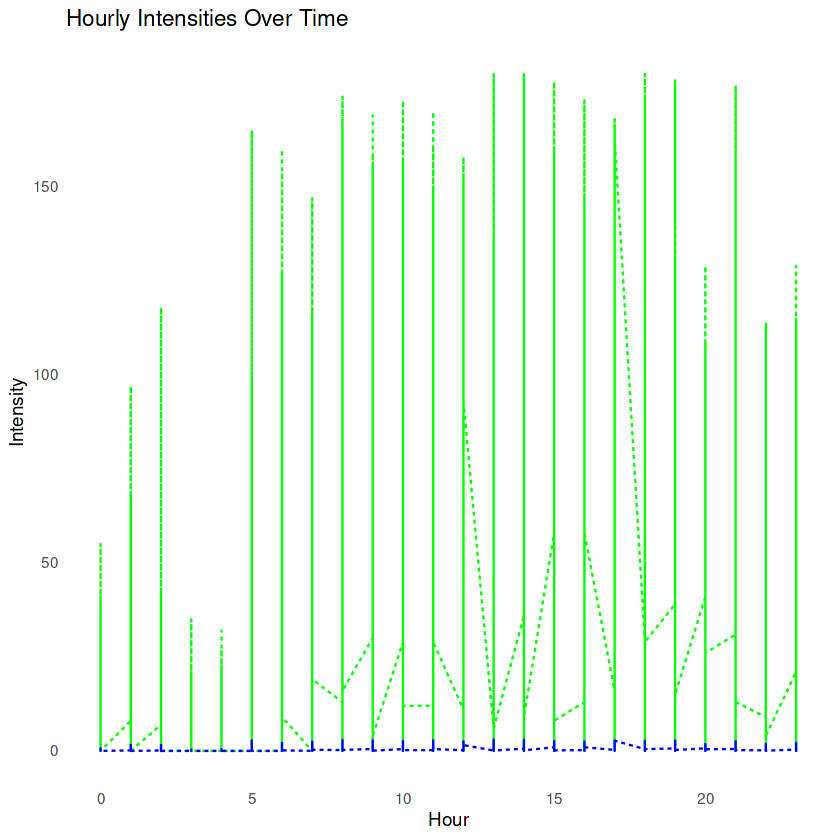

In [37]:
# Plot hourly steps over time
plot_steps <- ggplot(hourlySteps, aes(x = Hour, y = StepTotal)) +
  geom_line(color = "blue") +
  labs(title = "Hourly Steps Over Time",
       x = "Hour",
       y = "Step Total") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_steps)

# Plot hourly calories over time
plot_calories <- ggplot(hourlyCalories, aes(x = Hour, y = Calories)) +
  geom_line(color = "red") +
  labs(title = "Hourly Calories Over Time",
       x = "Hour",
       y = "Calories") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_calories)

# Plot hourly intensities over time
plot_intensities <- ggplot(hourlyIntensities, aes(x = Hour, y = TotalIntensity)) +
  geom_line(color = "green", linetype = "dashed") +
  geom_line(aes(y = AverageIntensity), color = "blue", linetype = "dashed") +
  labs(title = "Hourly Intensities Over Time",
       x = "Hour",
       y = "Intensity") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank()) +
  scale_linetype_manual(values = c("dashed", "dashed")) +
  scale_color_manual(values = c("green", "blue")) +
  guides(color = guide_legend(title = "Intensity", override.aes = list(linetype = c("dashed", "dashed"))))

print(plot_intensities)


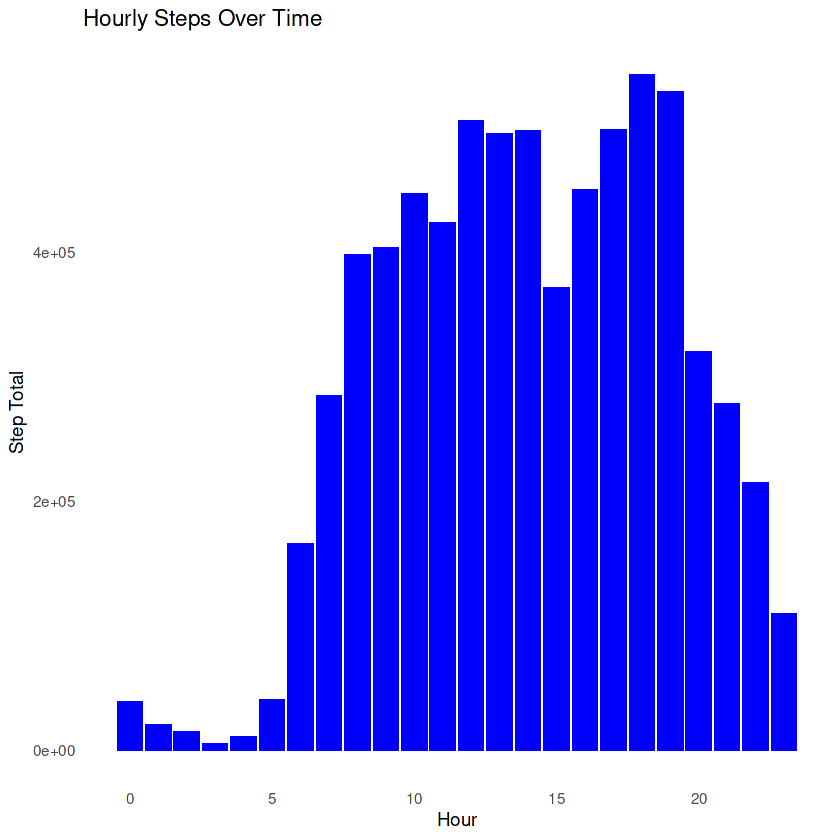

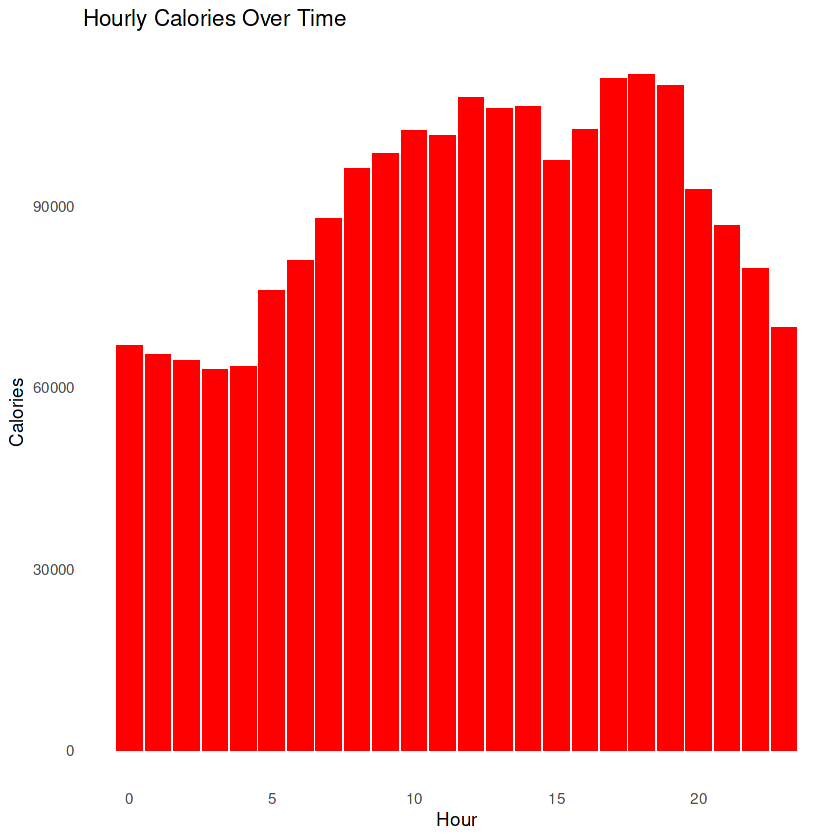

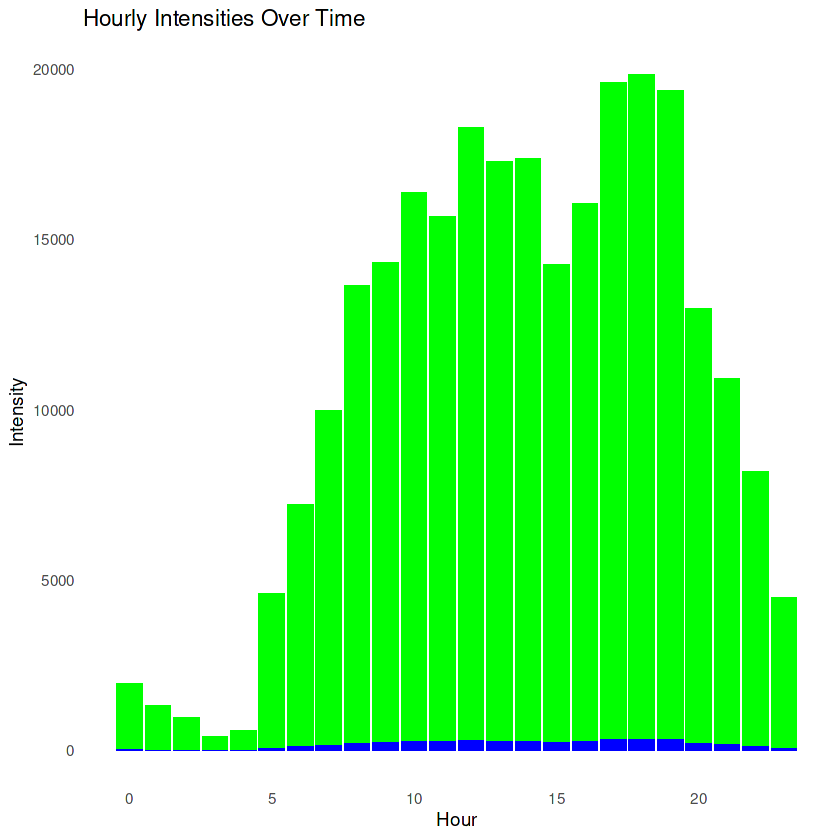

In [39]:
# Plot hourly steps over time
plot_steps <- ggplot(hourlySteps, aes(x = Hour, y = StepTotal)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Hourly Steps Over Time",
       x = "Hour",
       y = "Step Total") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_steps)

# Plot hourly calories over time
plot_calories <- ggplot(hourlyCalories, aes(x = Hour, y = Calories)) +
  geom_bar(stat = "identity", fill = "red") +
  labs(title = "Hourly Calories Over Time",
       x = "Hour",
       y = "Calories") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_calories)

# Plot hourly intensities over time
plot_intensities <- ggplot(hourlyIntensities, aes(x = Hour, y = TotalIntensity)) +
  geom_bar(stat = "identity", fill = "green") +
  geom_bar(aes(y = AverageIntensity), stat = "identity", fill = "blue") +
  labs(title = "Hourly Intensities Over Time",
       x = "Hour",
       y = "Intensity") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_intensities)


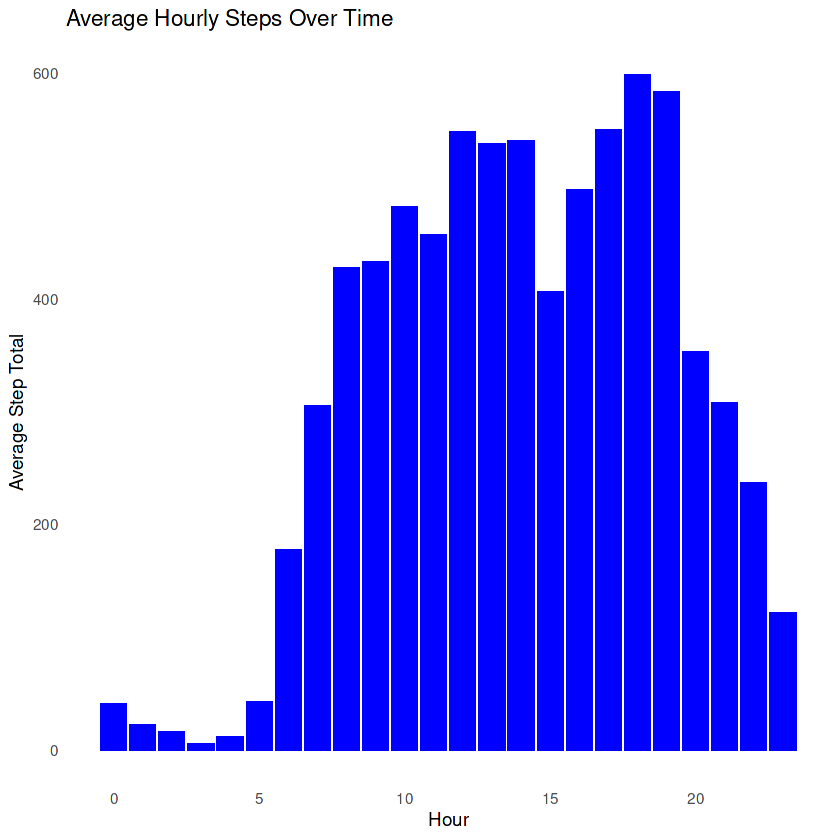

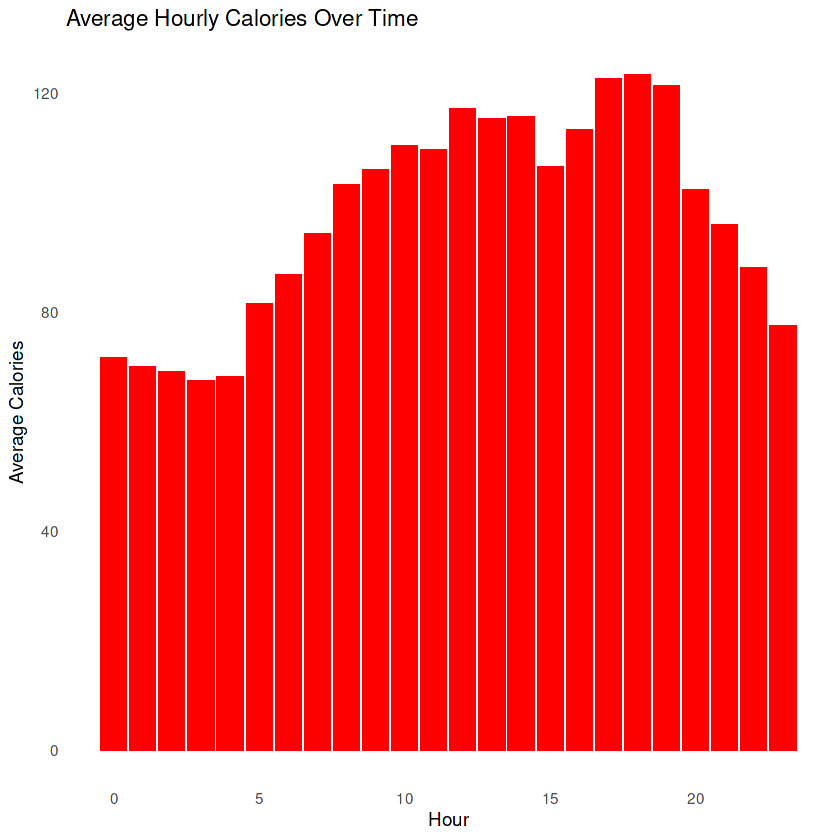

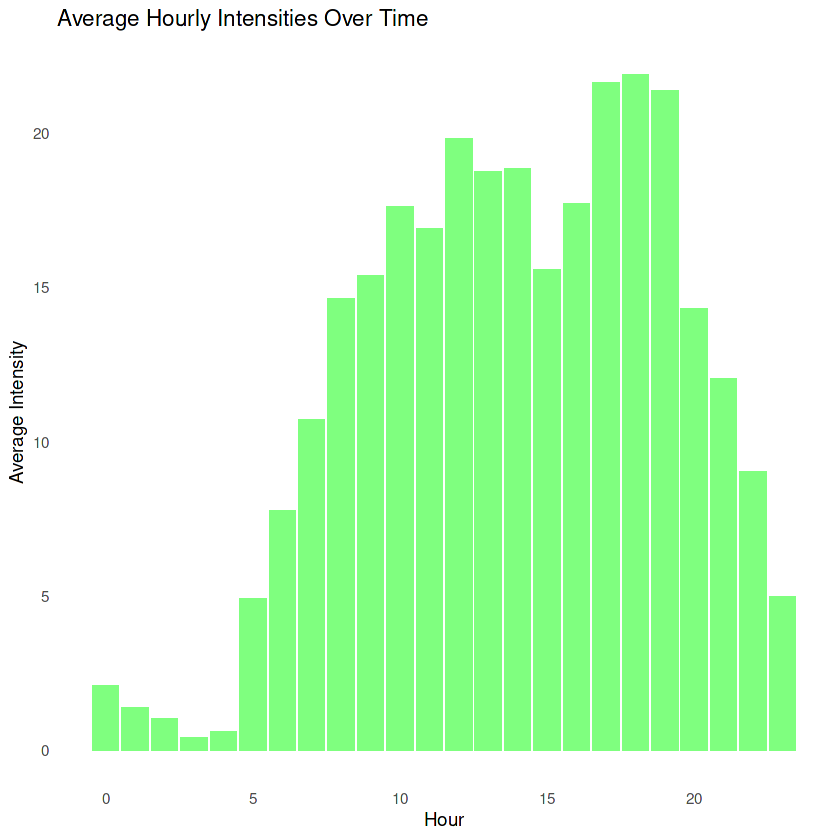

In [42]:
# Calculate average steps per hour
hourlySteps_avg <- hourlySteps %>%
  group_by(Hour) %>%
  summarise(AvgStepTotal = mean(StepTotal))

# Plot average hourly steps over time
plot_steps <- ggplot(hourlySteps_avg, aes(x = Hour, y = AvgStepTotal)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Average Hourly Steps Over Time",
       x = "Hour",
       y = "Average Step Total") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_steps)

# Calculate average calories per hour
hourlyCalories_avg <- hourlyCalories %>%
  group_by(Hour) %>%
  summarise(AvgCalories = mean(Calories))

# Plot average hourly calories over time
plot_calories <- ggplot(hourlyCalories_avg, aes(x = Hour, y = AvgCalories)) +
  geom_bar(stat = "identity", fill = "red") +
  labs(title = "Average Hourly Calories Over Time",
       x = "Hour",
       y = "Average Calories") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_calories)

# Calculate average intensities per hour
hourlyIntensities_avg <- hourlyIntensities %>%
  group_by(Hour) %>%
  summarise(AvgTotalIntensity = mean(TotalIntensity))
            
# Plot average hourly intensities over time
plot_intensities <- ggplot(hourlyIntensities_avg, aes(x = Hour)) +
  geom_bar(aes(y = AvgTotalIntensity), stat = "identity", fill = "green", alpha = 0.5) +
  labs(title = "Average Hourly Intensities Over Time",
       x = "Hour",
       y = "Average Intensity") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(plot_intensities)


In [ ]:
Type of users per activity level ¶
since we don't have any demographic variables from our sample we want to determine the type of users with the data we have. We can classify the users by activity considering the daily amount of steps. We can categorize users as follows:

Sedentary - Less than 5000 steps a day.
Lightly active - Between 5000 and 7499 steps a day.
Fairly active - Between 7500 and 9999 steps a day.
Very active - More than 10000 steps a day.

In [ ]:
We will calculate the number of users that use their smart device on a daily basis, classifying our sample into three categories knowing that the date interval is 31 days:

high use - users who use their device between 21 and 31 days.
moderate use - users who use their device between 10 and 20 days.
low use - users who use their device between 1 and 10 days.

In [ ]:
We will now determine if there is any correlation between different variables:

Daily steps and daily sleep

In [ ]:
We need to create a new data frame calculating the total amount of minutes users wore the device every day and creating three different categories:

All day - device was worn all day.
More than half day - device was worn more than half of the day.
Less than half day - device was worn less than half of the day.

In [ ]:
Remove duplicates and N/A